# Udacity Data Analysis Project 1: TMDb movie data


<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
    <ul>
    <li><a href="#q1">Quistion1: directors with the most appearances</a></li>
    <li><a href="#q2">Question2: What is the most repeated vote_ avreage ?</a></li>
    <li><a href="#q3">Question3: Who is the actor with the most appearance ?</a></li>
    <li><a href="#q4">Question4: What is the most repeated gener ?</a></li>
    <li><a href="#q5">Question5: What is the most repeated production_companies ?</a></li>
    </ul>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction
## This data set contains information about 10,000 movies collected from [The Movie Database (TMDb)](https://www.kaggle.com/tmdb/tmdb-movie-metadata), including user ratings and revenue.

this analysis looks into the vote average, directors properties and coorelations with the other data, and some statistics about actors moste appearance, the most repeated gener and the most repeated production company.

#### this dataset contains 10866 row and 21 columns which are:
<ul>    
<li>id</li>
<li>imdb_id</li>
<li>popularity</li>
<li>budget</li>
<li>revenue</li>
<li>original_title</li>
<li>cast</li>
<li>homepage</li>
<li>director</li>
<li>tagline</li>
<li>keywords</li>
<li>overview</li>
<li>runtime</li>
<li>genres</li>
<li>production_companies</li>
<li>release_date</li>
<li>budget_adj</li>
<li>revenue_adj</li>
</ul>
Certain columns, like ‘cast’ and ‘genres’, contain multiple values separated by pipe (|) characters.
There are some odd characters in the ‘cast’ column.
The final two columns ending with “_adj” show the budget and revenue of the associated movie in terms of 2010 dollars, accounting for inflation over time.

#### there are 5 questions we'll be investigating through this analysis:
<ul>
    <li>Quistion1: directors with the most appearances</li>
    <li>Question2: What is the most repeated vote_ avreage ?</li>
    <li>uestion3: Who is the actor with the most appearance ?</li>
    <li>Question4: What is the most repeated gener ?</li>
    <li>Question5: What is the most repeated production_companies ?</li>
</ul>

lets Begin by importing the libraries needed for analysis.

In [1]:
#loading necessary libraries. 
import pandas as pd
import numpy as np
import seaborn as sns
import operator
import matplotlib.pyplot as plt
%matplotlib inline
#Reading the .csv file into a pandas dataframe.
df = pd.read_csv("./Database_TMDb_movie_data/tmdb-movies.csv")

<a id='wrangling'></a>
## Data Wrangling

### reading the data:

importing the first three rows  

In [2]:
df.head(3)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08


Examine the shape of the dataframe, it contains 10866 row and 21 columns

In [5]:
df.shape

(10866, 21)

investigate the columns values

In [4]:
print(list(df.columns.values))

['id', 'imdb_id', 'popularity', 'budget', 'revenue', 'original_title', 'cast', 'homepage', 'director', 'tagline', 'keywords', 'overview', 'runtime', 'genres', 'production_companies', 'release_date', 'vote_count', 'vote_average', 'release_year', 'budget_adj', 'revenue_adj']


farther investegtion to find out the each column conent type and count

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

investigating a spacefic column type

In [7]:
print(type(df["release_date"].iloc[1]))

<class 'str'>


counting the null values in each column

In [8]:
df.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

usefull descriptive statistics for each column

In [9]:
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


### Some problems in the data that needs to be fixed :
<ol>
<li>Missing values in the following rows:
    <ul>
    <li>imdb_id
    <li>cast
    <li>homepage
    <li>director
    <li>tagline
    <li>keywords
    <li>overview
    <li>genres
    <li>production_companies
    </ul>
</li>
<li>the "release_date" needs to be converted from "str" to "datetime"</li>
<li>some columns contain multiple values separated by pipe (|) characters "i will solve this proplem in the Exploratory Data Analysis". </li>
<li>there are some unusefull columns that won't be included in ower analysis</li>
</ol>


### Data Cleaning

now i'm creating a copy of my data to make sure i can return to the originall data if somthing went wrong

In [10]:
new1_df = df.copy()

converting the release_date from "str" to "datetime"

In [11]:
new1_df["release_date"] = new1_df["release_date"].astype('datetime64[ns]')

lets drop some unimportant columns to make our data more consistent

In [12]:
new1_df.drop(["homepage", "tagline", "overview", "id", "imdb_id", "keywords"],axis = 1, inplace = True)

now i'm making sure if changes i've made had applied correctly to the data

In [13]:
new1_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 15 columns):
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
director                10822 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null datetime64[ns]
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              10866 non-null float64
revenue_adj             10866 non-null float64
dtypes: datetime64[ns](1), float64(4), int64(5), object(5)
memory usage: 1.2+ MB


making sure if the release_ year type has converte into datetime 

In [14]:
print(type(new1_df["release_year"].iloc[1]))

<class 'numpy.int64'>


now i am dropping the missing values only from ('genres', 'cast', 'director', 'runtime') without including 'production_companies' in the process, i found that 'production_companies' column containes alot of "nan" values and, i don't want to waste all these data so i am keeping it till we need it later in the 'exploratory data analysis' section, where i will clean them from nan values and visualise there statistics in one step.

In [16]:
new1_df.dropna(subset=["genres", "cast", "director", "runtime"], inplace=True)

making sure the process went well by checking the count of null values for every column again.

In [17]:
new1_df.isnull().sum()

popularity                0
budget                    0
revenue                   0
original_title            0
cast                      0
director                  0
runtime                   0
genres                    0
production_companies    959
release_date              0
vote_count                0
vote_average              0
release_year              0
budget_adj                0
revenue_adj               0
dtype: int64

<a id='eda'></a>
## Exploratory Data Analysis

### first lets insert some important functions

##### this function was created to fix the third problem uppove in Data Wrangling section which was:
 some columns contain multiple values separated by pipe (|) characters
##### what does the function do?
 it takes the column name and split it by the pipe character (|),
then counts the number of times every name has been mentioned,
and returns a dictionary of the names attached to its number of appearance. 

In [18]:
def splite(columns_s):
    dict_sp = {}

    c_values = columns_s
    c_values = c_values.str.split("|")
    c_values = np.array(c_values)
    for values_list in c_values:
        for value_v in values_list:
            value_v = value_v.lstrip() #remove the whitespaces
            if value_v not in dict_sp:
                dict_sp[value_v] = 1
            else:
                dict_sp[value_v] += 1
    return dict_sp 

###### this function was created to display a plot using seaborn 
##### how does the function works ? 
it takes a dictionary of names\keys and its values, and return a statistical plot.

In [19]:
def sort(column, xlabel, ylabel, title, palette):
    sorted_actor_dict = sorted(column.items(), key = operator.itemgetter(1), reverse = True)

    x_axis = list()
    y_axis = list()

    for item in sorted_actor_dict[0:30]:
        x_axis.append(item[0])
        y_axis.append(item[1])


    sns.set(rc={'figure.figsize':(12,10)}, font_scale=1.4)
    ax = sns.barplot(x_axis, y_axis, palette= palette)


    #rotate x-axis' text
    for item in ax.get_xticklabels():
        item.set_rotation(85)
    

    ax.set(xlabel= xlabel, ylabel= ylabel, title = title)
    plt.show()
    return plt.show()  

<a id='q1'></a>
### Question1: directors with the most appearances  

first i will creat a list of the directors names

In [20]:
director_list = new1_df["director"].values.tolist()

now we'll creat a dictionary to Store the number of times each direcor's name has been mintioned

In [21]:
director_dict1 = {}
for director in director_list:
        director = director.lstrip() 
        if director not in director_dict1:
            director_dict1[director] = 1
        else:
            director_dict1[director] += 1

now we'll use the function i've prepared above to visualize the statistics

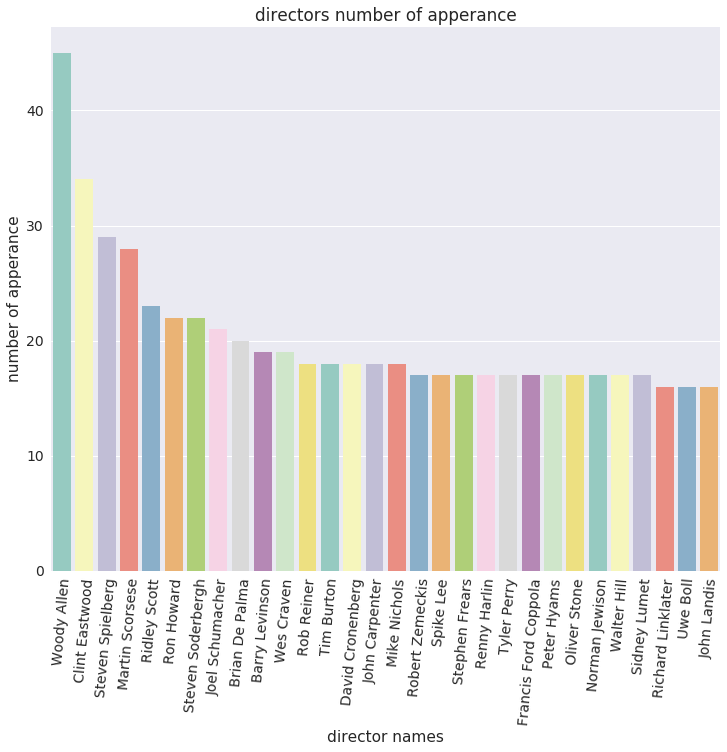

In [22]:
sort(director_dict1, "director names", "number of apperance", "directors number of apperance" , "Set3")

now we can say that the top 5 directors with the biggest number of appearances are woody Allen, Clint Eastwood, Steven Spielberg, Martin Scorese and Ridley Scptt.

#### Question1.1: what is the correlation between the director name and the movies budget?

first i want to learn more about the budget so we'll display its descriptive statistics using this helpful function

In [23]:
 new1_df['budget'].describe()

count    1.073200e+04
mean     1.480506e+07
std      3.106345e+07
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      1.600000e+07
max      4.250000e+08
Name: budget, dtype: float64

i found that there is a lot of rows that contains 0 so i am creating new column seprated from the orignal dataset this column won't contain have any 0 values as its not rational to have a movie with a budget cost of 0.

In [24]:
cleaned_budjet = new1_df[new1_df.budget != 0]

now i'm creating a zip to append the director column with the budget column so i can convert it into a dictionary

In [25]:
zip(cleaned_budjet.director, cleaned_budjet.budget)

creating the dictionary

In [26]:
director_and_budget_dict = dict(zip(cleaned_budjet.director, cleaned_budjet.budget))

shall we display our statistical plot for the correlation between the director name and the movie budget. 
i"ll be using the same function attached uppove.

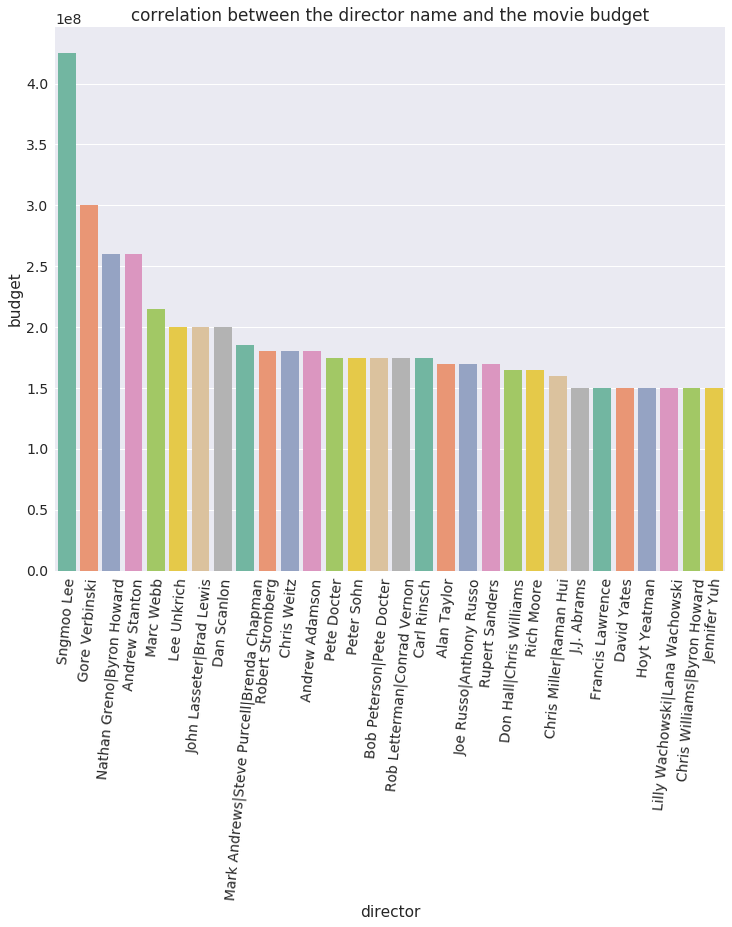

In [27]:
sort(director_and_budget_dict, "director", "budget", "correlation between the director name and the movie budget", "Set2")

we can notice how Sngmoo Lee and Gore Verbinski appearance are Supervisor with the movies with high budget.

#### Question1.2: what is the correlation between the director name and the movies revenue?

##### we'll be following the same process used in the correlation between directors and the budget
checking if it contains alot of 0 values like the budget column 

In [28]:
 new1_df['revenue'].describe()

count    1.073200e+04
mean     4.031622e+07
std      1.176476e+08
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      2.500000e+07
max      2.781506e+09
Name: revenue, dtype: float64

seems like it needs to be cleaned to 

In [29]:
cleaned_revenue = new1_df[new1_df.revenue != 0]

now i am creating its zip that will be converted into a dictionary

In [30]:
zip(cleaned_revenue.director, cleaned_revenue.revenue)

converting into a dictionary

In [31]:
director_and_revenue_dict = dict(zip(cleaned_revenue.director, cleaned_revenue.revenue))

now i'll pass it through the sort function to create a plot

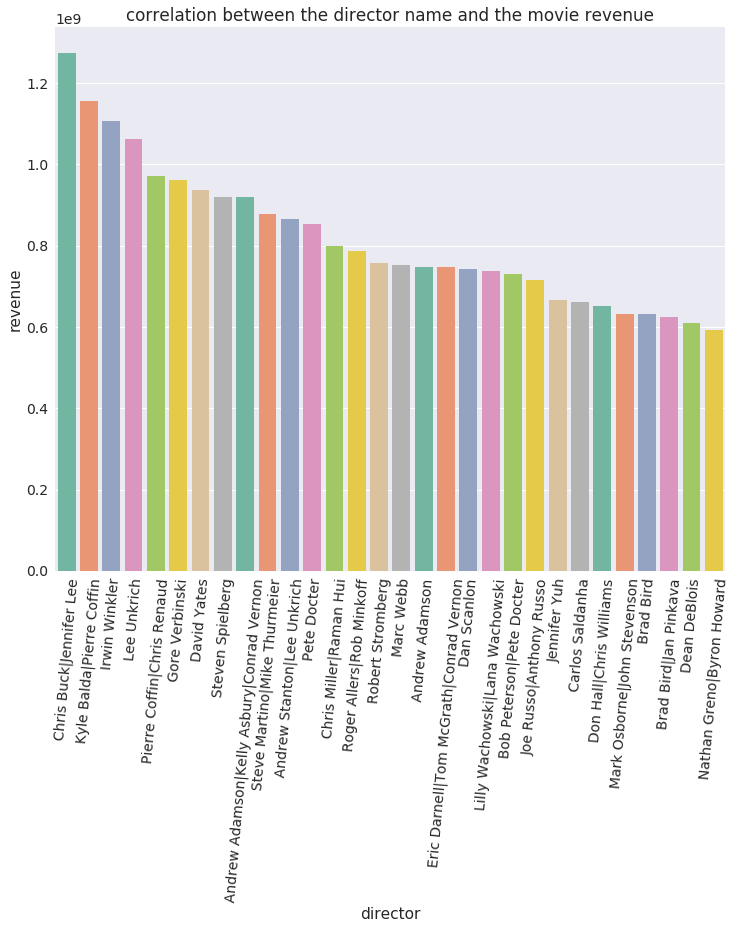

In [32]:
sort(director_and_revenue_dict, "director", "revenue", "correlation between the director name and the movie revenue", "Set2")

Chrise Buckljennifer Lee gets the first class in the plot, while Gore Verbinski who has got the second place in the relation between the director and budget gets the fifth position in the correlation between revenue and directors names.

#### Question1.3: what is the correlation between the director name and the movies popularity?

In [33]:
column_zipped = zip(new1_df.director, new1_df.popularity)

In [34]:
pop_dict = dict(column_zipped)

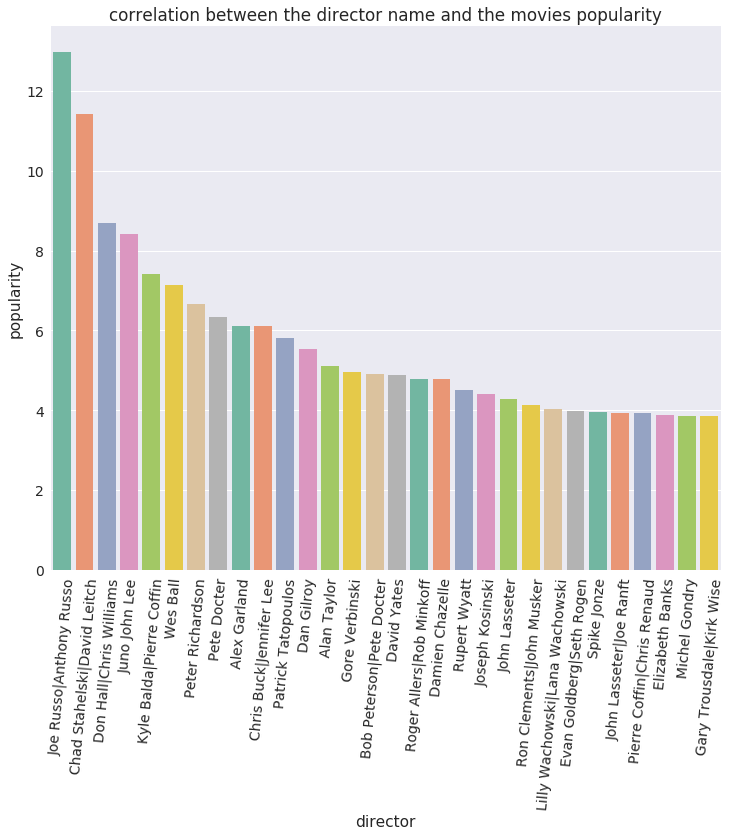

In [35]:
sort(pop_dict, "director", "popularity", "correlation between the director name and the movies popularity", "Set2")

seems like woody not very fames dispite he is the most appeared dirctor in the period from 1960 to 2015.

<a id='q2'></a>
### Question2: What is the most repeated  vote_ avreage ?

a histograme to count the numbers each vote rating has appeared 

Text(0,0.5,'count')

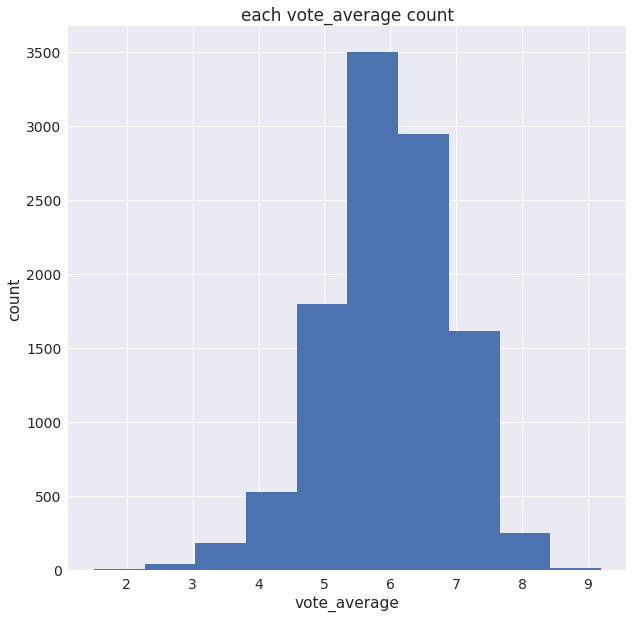

In [36]:
df.vote_average.hist(figsize = (10, 10))
plt.title("each vote_average count")
plt.xlabel("vote_average")
plt.ylabel("count")

the majority tend to choose to rat a movie with 6 from 10

#### question2.1: relation between vote_average and budget_adj

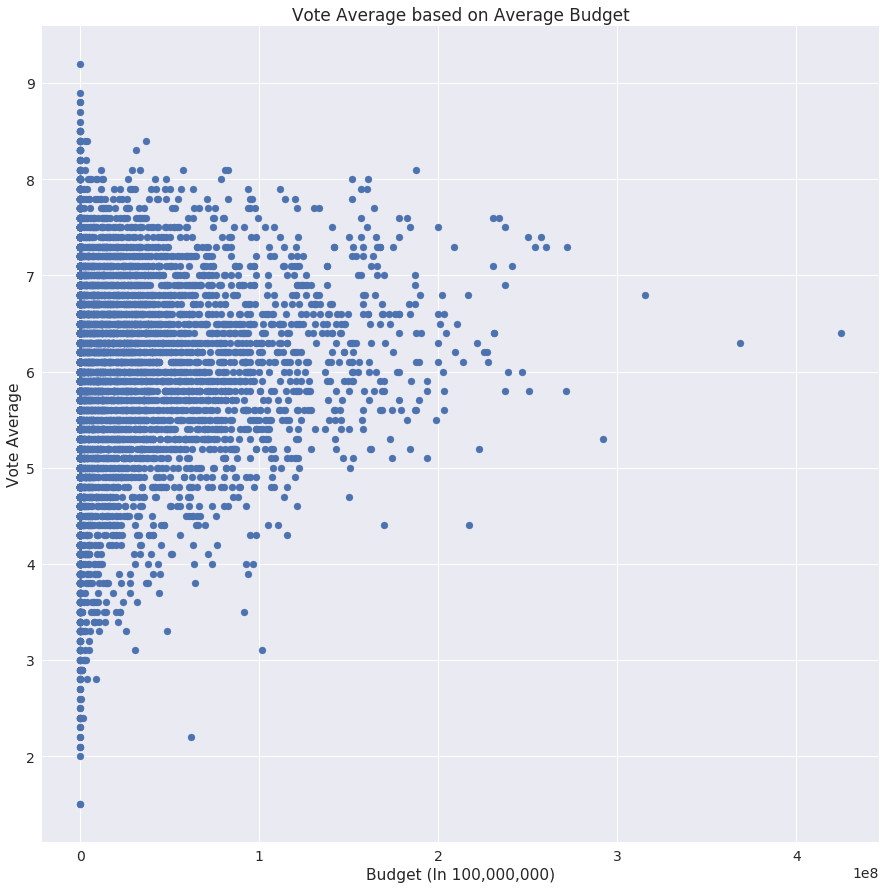

In [53]:
plt.figure(figsize = (15, 15))
plt.title('Vote Average based on Average Budget')
plt.xlabel("Budget (In 100,000,000)")
plt.ylabel('Vote Average')
graph = plt.scatter(df['budget_adj'], df['vote_average'])
plt.show()

seems like the movie's budget starts to increase in the rang varies fron 5 to 8

#### question2.2: relation between vote_average and popularity

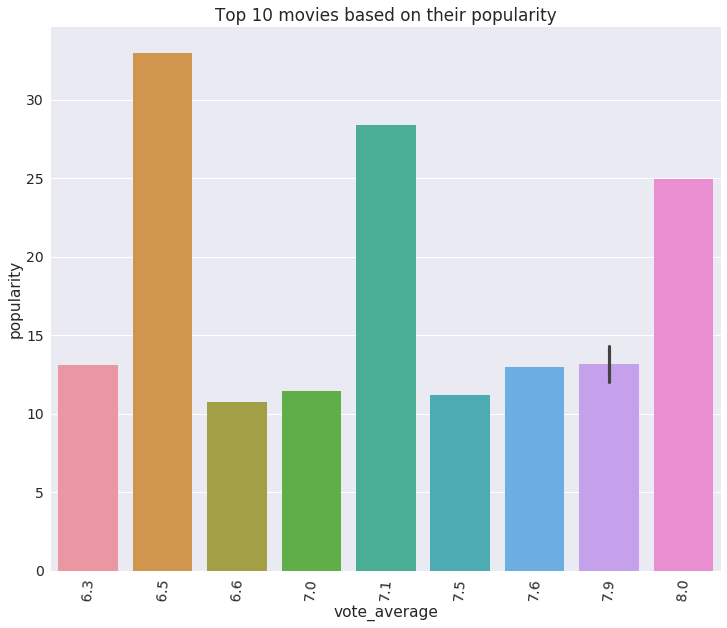

In [54]:
movies_and_vote_average = new1_df[['vote_average','popularity']]
 
ax = sns.barplot(
    movies_and_vote_average.sort_values(by="popularity", ascending=False).head(10).vote_average, 
    movies_and_vote_average.sort_values(by="popularity", ascending=False).head(30).popularity)


#rotate x-axis' text
for item in ax.get_xticklabels():
    item.set_rotation(85)

ax.set(xlabel='vote_average', ylabel='popularity', title = 'Top 10 movies based on their popularity')
plt.show()


movies that are most popular got the ratinges of 6.5, 7.5 and 8

#### question2.3: relation between vote_average and runtime

first i'll create some ranges to make the runtime more specific

In [55]:
# i'll create 5 renges from 0 to 30m, from 30m to 60m, from 60m to 90m, from 90m to 120m and from 120m to the maximum number
_30m = new1_df.query("runtime <=  30") 
_60m = new1_df.query("30 < runtime <= 60")
_1_30m = new1_df.query("60 < runtime <= 90")
_2h= new1_df.query(" 90 < runtime <= 120")
more_then_2h = new1_df.query("runtime > 120")

# making sure that these queries are correct an equal to the original, nothing is missing
num_samples = new1_df.shape[0]
num_samples == _30m["runtime"].count() + _60m["runtime"].count() + _1_30m["runtime"].count() + _2h["runtime"].count() + more_then_2h["runtime"].count()

True

preparing the mean of each vote range associated with the runtime range specified uppove

In [56]:
mean_30m = _30m["vote_average"].mean()
mean_60m = _60m["vote_average"].mean()
mean_1_30m = _1_30m["vote_average"].mean()
mean_2h = _2h["vote_average"].mean()
mean_more_then_2h = more_then_2h["vote_average"].mean()

creating the bar chart 

Text(0,0.5,'vote average')

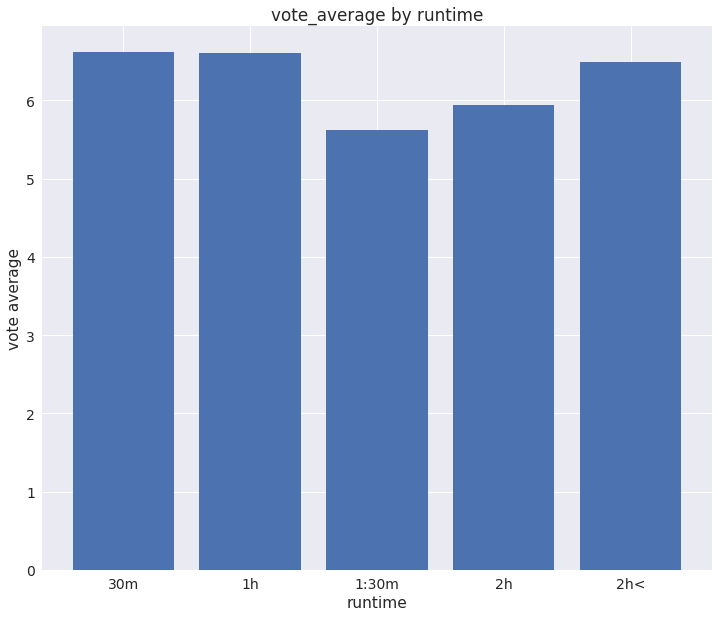

In [58]:
#Create a bar chart with proper labels
location = [1, 2, 3, 4, 5]
hights = [mean_30m, mean_60m, mean_1_30m, mean_2h, mean_more_then_2h]
lables = ["30m", "1h", "1:30m", "2h", "2h<"]
plt.bar(location, hights, tick_label =lables)
plt.title("vote_average by runtime")
plt.xlabel("runtime")
plt.ylabel("vote average")

almost the same but its clear that the movies with 1:30m runtime got the less vote average of them all

<a id='q3'></a>
###  question3: who is the actor with the most appearance ?

let's use the split function to help us solve the pipe (|) problem and count the appearance number for each actor

In [60]:
most_appearance = splite(new1_df["cast"])

now i'll pass it through the sort function to sort them and create a statistical plot

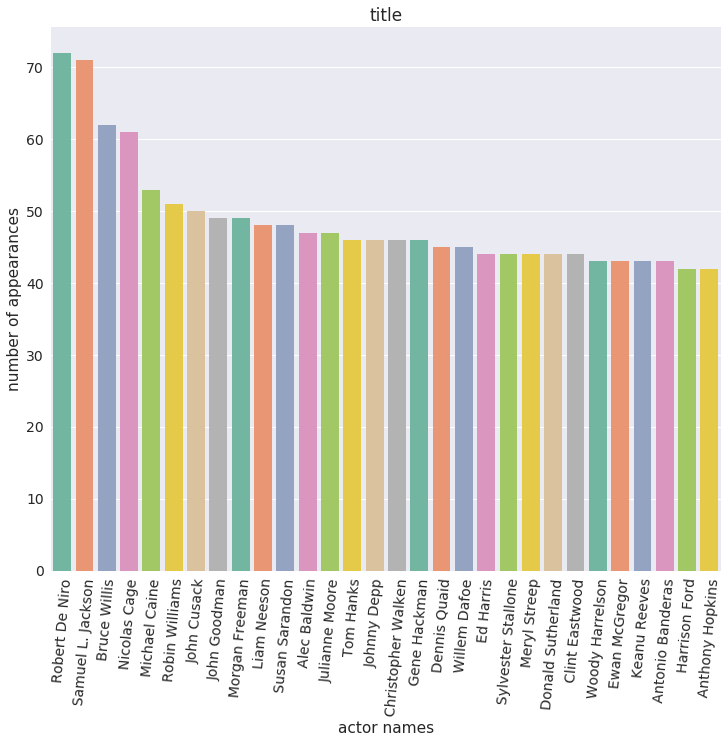

In [61]:
sort(most_appearance, 'actor names', 'number of appearances', 'title', 'Set2')

It is obvious  that the top 5 actors with the biggest number of appearances are Robert De Niro, Samuel L. Jackson, Bruce Willis, Nicolas Cage and Michael Cane.

<a id='q4'></a>
###  question4: what is the most repeated gener ?

i'll pass it throw the same process as it also contains a pip (|) character

In [62]:
most_repeated_genre = splite(new1_df["genres"])

In [1]:
sort(most_repeated_genre, 'genres names', 'number of repetition', 'the most repeated gener between 1960 and 2015.', 'Set3')

NameError: name 'sort' is not defined

Drama, comedy and thriller were the most generated kind of movies between 1960 and 2015.

<a id='q5'></a>
### question5: what is the most repeated production companies ?

for this question we'll be creating a copy of the column to remove the null values that haven't been removed before, as i mentioned they were a lot and removing them from the original dataset will waste a lot of data.

In [65]:
production_companies_df = df["production_companies"].copy()

now i'am dropping the null values

In [66]:
production_companies_df.dropna(inplace=True)

checking if i've dropped all the null values correctly

In [67]:
production_companies_df.isnull().sum()

0

now let's pass them throw the two functions split & sort to visualise the data

In [70]:
most_production_companie = splite(production_companies_df)

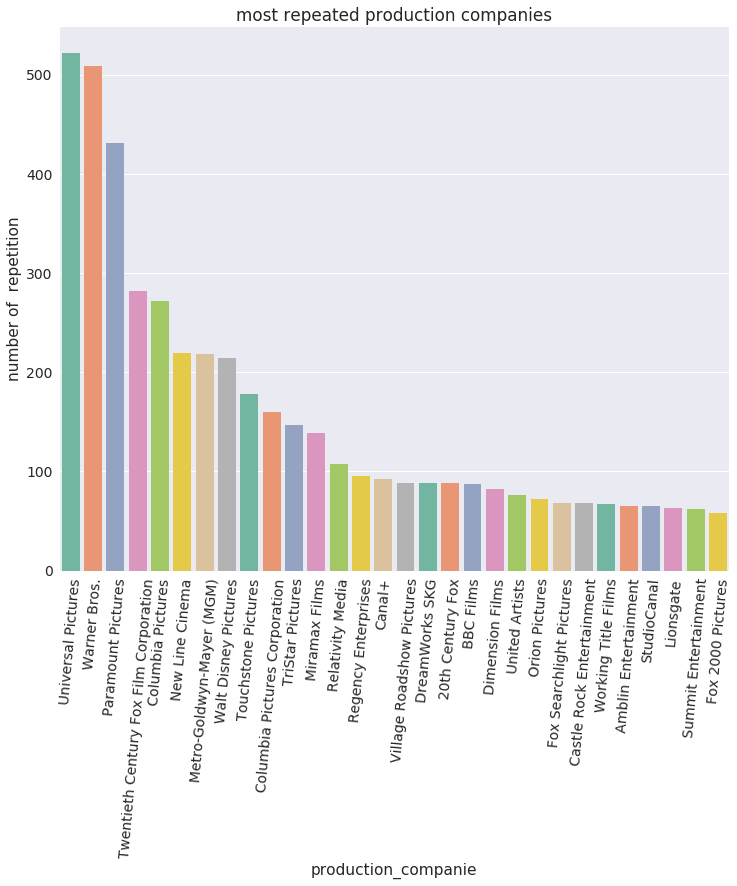

In [71]:
sort(most_production_companie, 'production_companie', 'number of  repetition', 'most repeated production companies', 'Set2')

Universal Pictures, Warner Bros, Paramount Pictures are the most reapeted companies

<a id='conclusions'></a>
## Conclusions

> **Tip**: Finally, summarize your findings and the results that have been performed in relation to the question(s) provided at the beginning of the analysis. Summarize the results accurately, and point out where additional research can be done or where additional information could be useful.

> **Tip**: Make sure that you are clear with regards to the limitations of your exploration. You should have at least 1 limitation explained clearly. 

> **Tip**: If you haven't done any statistical tests, do not imply any statistical conclusions. And make sure you avoid implying causation from correlation!

> **Tip**: Once you are satisfied with your work here, check over your report to make sure that it is satisfies all the areas of the rubric (found on the project submission page at the end of the lesson). You should also probably remove all of the "Tips" like this one so that the presentation is as polished as possible.


<a id='conclusions'></a>
## Conclusions
This notecook has analyzed the The Movie Database (TMDb) to answer these five questions:
<ul>
    <li>Quistion1: directors with the most appearances
    <li>Question2: What is the most repeated vote_ avreage ?
    <li>Question3: Who is the actor with the most appearance ?
    <li>Question4: What is the most repeated gener ?
    <li>Question5: What is the most repeated production_companies ?
</ul>
in the first Question we found out which director has worked on the majority of the movies in this data set, who was Woody Allen, altho Woody allen was the most appeared director of them all, he dosen't seem to be none that much, and his name didn't appear amonge the first 30 directoers whom where associated with the highest revenue and movie budget during the period from 1960 to 2015.
Segoo lee and Gore Verbinski has got the first and second ranks in the association between the movies budget and the directors names.
but then we could notice that only Gore Verbinski appeared among the first 30 director's names associated with high revenue, and that he is ranked in the 6th rank which is bretty good.
the first three directors teames ther supervising on the movies was associated with the highest revenue where Chris Buck & Jennifer Lee, Kyle Balda & Pierre Coffin and Irwin Winkler.
looking at the coorelations between the directors names and the movies popularity, we could again notic Gore Verbinski's name taking the 14th rank amonge the first thirteen directors.
also we could notice that Lee Unkirch and jphan lasster names where reapeted in both drectors related to highest revenue and highest movies budget, with johan appearing in the first 30 director associated with movies popularity.

now lets take a look at the results we got from the second question.
it seems that most people tend to rate the movies from (5 to 7.5), and almost the same range is associate with the higher budget.
in the third plot inside this section we can notice how thinges changes, as the movies popularity was significantly higher at these following ratings (8, 7.1, 6.5)in order, very interesting phenomena.
then when we take a look at the forth plot which examine the correlation between vote average an runtime, we can tell that the bars were bretty close, despite the fact that it opviose how movies with 1:30m runtime recives the lowest vote rating.

then from Question 3 we found out the most appeared 3 actors from 1960 to 2015 and they were:
Robert De Niro, Samuel L. Jackson, Bruce Willis.

then from Question 4, the most generated genre type was Drama.

finally Question 5, with the most repeated production companies:
Universal Pictures, Warner Bros, Paramount Pictures, Twentieth Century Fox Film Corporation.

#### limitations
this data contains a lot of null values and 0 values that had to be dropped, which cause wasting a lot of data.

#### fruther analyses
we can make fruther analyses in the ratings correlationg to notice the viewers  behavior and get to know how to increase there ratings 
also there will be very interesting results if we could analyes the directors correlations farther more

In [74]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0